In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Prepara data

In [ ]:
df = pd.read_csv("11534_tweets.csv")

In [ ]:
df

,id,name,screen_name,created_at,text,location,followers_count,friends_count,listed_count,retweet_count,favorite_count
0,1460631062023917570,Lucas Stollmeier,StollmeierLucas,2021-11-16 15:29:17,b'RT @SheldonEvans: Just hit 200K!\n\xf0\x9f\x...,NaN,0,22,0,4702,0
1,1460631061038198796,علی حیدری,lyhydry1,2021-11-16 15:29:16,b'RT @heliosarmy: @lexfridman We believe that ...,NaN,3,3,0,84,0
2,1460631060778303490,Coldstar,Coldsta93422887,2021-11-16 15:29:16,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,5,346,1,1318,0
3,1460631059889115149,PJ,Jose_1017,2021-11-16 15:29:16,b'@davidgokhshtein Load your bags we\xe2\x80\x...,Puerto Rico,55,581,2,0,0
4,1460631057636679680,ام سوسو,omsosoo0,2021-11-16 15:29:16,b'RT @Next100xToken: \xf0\x9f\x94\xa5 #Next100...,NaN,84,4340,0,520,0
...,...,...,...,...,...,...,...,...,...,...,...
11529,1461103726064812032,Muhammad Asad Nadeem,Muhammad8255011,2021-11-17 22:47:28,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,7,111,0,18092,0
11530,1461103722126323716,Benedito Campos,Benedit80592865,2021-11-17 22:47:28,b'RT @AIBCsummit: A huge thank you to everyone...,NaN,26,63,1,1544,0
11531,1461103721388167172,Yen Ngoc,YenNgoc45,2021-11-17 22:47:27,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,0,22,0,4495,0
11532,1461103717265063939,Billy - Crypto 💻🔑,billydavies___,2021-11-17 22:47:26,b'The market bleeeeds \xf0\x9f\xa9\xb8 again t...,Australia,64,221,0,0,0


In [ ]:
#We just need attention for now
attention_df = df[['screen_name','text']]
attention_df

,screen_name,text
0,StollmeierLucas,b'RT @SheldonEvans: Just hit 200K!\n\xf0\x9f\x...
1,lyhydry1,b'RT @heliosarmy: @lexfridman We believe that ...
2,Coldsta93422887,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...
3,Jose_1017,b'@davidgokhshtein Load your bags we\xe2\x80\x...
4,omsosoo0,b'RT @Next100xToken: \xf0\x9f\x94\xa5 #Next100...
...,...,...
11529,Muhammad8255011,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...
11530,Benedit80592865,b'RT @AIBCsummit: A huge thank you to everyone...
11531,YenNgoc45,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...
11532,billydavies___,b'The market bleeeeds \xf0\x9f\xa9\xb8 again t...


In [ ]:
def find_messages_with_str(df, *argv):
  """This function takes a dataframe = df, and a any number of word parameters 
  through the *argv arguments. This function returns a NEW dataframe with the
  messages that contain all the words (word1 & word2 & ... wordn) unwrapped 
  from the *argvs

  Parameters:
         df = Dataframe with the columns ['Date', 'Messages']
      *argv = Every argument is a different word to be matched
  """

  #Create a regular expression pattern containing all words
  regex_pattern = ''
  for arg in argv:
    regex_pattern += '(?=.*' + arg + ')'

  #filter the dataframe through the regular expression and return the new df
  result = df['text'].str.contains(pat = regex_pattern, regex=True)
  filtered_df = df.loc[result]
  return filtered_df

In [ ]:
def find_messages_with_retweet(df):
  # Create a regular expression pattern containing all words
  regex_pattern = 'RT @'

  # filter the dataframe through the regular expression and return the new df
  result = df['text'].str.contains(pat = regex_pattern, regex=True)
  filtered_df = df.loc[result]
  return filtered_df

attention_df = find_messages_with_retweet(attention_df)
attention_df

,screen_name,text
0,StollmeierLucas,b'RT @SheldonEvans: Just hit 200K!\n\xf0\x9f\x...
1,lyhydry1,b'RT @heliosarmy: @lexfridman We believe that ...
2,Coldsta93422887,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...
4,omsosoo0,b'RT @Next100xToken: \xf0\x9f\x94\xa5 #Next100...
6,menang_yu88,b'RT @ShiborgToken: #SHIBORGARMY are you excit...
...,...,...
11528,riruru2777,b'RT @giveawaybanana: BANANA GIVEAWAY #70\n\nP...
11529,Muhammad8255011,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...
11530,Benedit80592865,b'RT @AIBCsummit: A huge thank you to everyone...
11531,YenNgoc45,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...


In [ ]:
attention_df['original_user'] = attention_df['text'].str.extract(r'RT @([^\s]+)')
attention_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,screen_name,text,original_user
0,StollmeierLucas,b'RT @SheldonEvans: Just hit 200K!\n\xf0\x9f\x...,SheldonEvans:
1,lyhydry1,b'RT @heliosarmy: @lexfridman We believe that ...,heliosarmy:
2,Coldsta93422887,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,CryptoTownEU:
4,omsosoo0,b'RT @Next100xToken: \xf0\x9f\x94\xa5 #Next100...,Next100xToken:
6,menang_yu88,b'RT @ShiborgToken: #SHIBORGARMY are you excit...,ShiborgToken:
...,...,...,...
11528,riruru2777,b'RT @giveawaybanana: BANANA GIVEAWAY #70\n\nP...,giveawaybanana:
11529,Muhammad8255011,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,CryptoTownEU:
11530,Benedit80592865,b'RT @AIBCsummit: A huge thank you to everyone...,AIBCsummit:
11531,YenNgoc45,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,CryptoTownEU:


In [ ]:
#Remove the colons 
attention_df['original_user'] = attention_df['original_user'].str.extract('([^\s]+):')
attention_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,screen_name,text,original_user
0,StollmeierLucas,b'RT @SheldonEvans: Just hit 200K!\n\xf0\x9f\x...,SheldonEvans
1,lyhydry1,b'RT @heliosarmy: @lexfridman We believe that ...,heliosarmy
2,Coldsta93422887,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,CryptoTownEU
4,omsosoo0,b'RT @Next100xToken: \xf0\x9f\x94\xa5 #Next100...,Next100xToken
6,menang_yu88,b'RT @ShiborgToken: #SHIBORGARMY are you excit...,ShiborgToken
...,...,...,...
11528,riruru2777,b'RT @giveawaybanana: BANANA GIVEAWAY #70\n\nP...,giveawaybanana
11529,Muhammad8255011,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,CryptoTownEU
11530,Benedit80592865,b'RT @AIBCsummit: A huge thank you to everyone...,AIBCsummit
11531,YenNgoc45,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,CryptoTownEU


In [ ]:
attention_df = attention_df.drop(columns='text')
attention_df

,screen_name,original_user
0,StollmeierLucas,SheldonEvans
1,lyhydry1,heliosarmy
2,Coldsta93422887,CryptoTownEU
4,omsosoo0,Next100xToken
6,menang_yu88,ShiborgToken
...,...,...
11528,riruru2777,giveawaybanana
11529,Muhammad8255011,CryptoTownEU
11530,Benedit80592865,AIBCsummit
11531,YenNgoc45,CryptoTownEU


In [ ]:
attention_df['weight'] = 1
weighted_attention_df = attention_df.groupby(['screen_name','original_user']).agg({'weight': ['sum']})

In [ ]:
weighted_attention_df

,,weight
,,sum
screen_name,original_user,
00sabbir,AirdropDet,1
073sagi,KaylaJo78107369,1
09795s,khalifacrypt0,1
0Iktier,CryptoTownEU,1
0bewun,HBarMigos,1
...,...,...
zolfi_hamid,CryptoTownEU,1
zrnnsxtn,FairdeskGlobal,1


In [ ]:
weighted_attention_df.describe() 

,weight
,sum
count,8221.000000
mean,1.111422
std,0.549047
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,12.000000


In [ ]:
#Tuple list only has weights > 1
tuple_list = []
for row in weighted_attention_df.iterrows():
  if row[1][0] > 1:
    tuple = (row[0][0], row[0][1], row[1][0])
    tuple_list.append(tuple)

In [ ]:
#Tuple list full has everything, including weights = 1
tuple_list_full = []
for row in weighted_attention_df.iterrows():
  tuple = (row[0][0], row[0][1], row[1][0])
  tuple_list_full.append(tuple)

In [ ]:
#Tuple list full has everything, including weights = 1
tuple_list_smart = []
users_of_interest = ['GyroCryptoBTC', 'revolut20']#['CryptoTownEU', 'adrian__chamber', 'AIBCsummit', 'AirdropDet', 'airdropinspect', 'AltcoinDailyio', 'chiqshoes', 'CryptoAlcoholi', 'CryptoTownEU', 'Eltanteco', 'FUMindset', 'Fydcoin', 'gate_io', 'GyroCryptoBTC', 'Heather99924565', 'Next100xToken', 'Pandainu21', 'POODLETOKEN', 'revolut20', 'SeaDemonsNFT', 'SheldonEvans', 'SherlockWallet', 'SolanaPixsols', 'WILDERCRYPTOO']
for row in weighted_attention_df.iterrows():
  if (row[0][1] not in users_of_interest):
    continue
  tuple = (row[0][0], row[0][1], row[1][0])
  tuple_list_smart.append(tuple)

In [ ]:
tuple_list

[('0f4ZVDzolSjPOy8', 'CryptoTownEU', 3),
 ('12_prometheuss', 'CryptoDuches', 2),
 ('183Lounge', 'CryptoTownEU', 2),
 ('20thwanderer', 'RealShiller', 2),
 ('73mikel70', 'airdropinspect', 2),
 ('AAAfffrrraaa11', 'revolut20', 2),
 ('AB62548510', 'dominooo0123', 2),
 ('AGIProphet', 'MarryMunch', 2),
 ('AKShishir2', 'CryptoTownEU', 2),
 ('Aaron64874399', 'AIBCsummit', 2),
 ('AbdolkarimZ', 'VOICEOFSHIBA', 3),
 ('AbdulHak1994', 'CryptoTownEU', 2),
 ('AbdulkarimTaof4', 'CryptoTownEU', 2),
 ('Abir09141058', 'CryptoTownEU', 2),
 ('AbubakkarShebin', 'monkeyballgame', 2),
 ('AchhiaMst', 'CryptoTownEU', 3),
 ('AdeotiObanijesu', 'KiwiCoinBSC', 3),
 ('AdkJohanne', 'Soy_Finance', 5),
 ('AghaBabak', 'CryptoTownEU', 2),
 ('Ahmad1282961656', 'CryptoTownEU', 2),
 ('Ahmet342861', 'CryptoTownEU', 2),
 ('Ahsannafi890', 'airdropinspect', 3),
 ('Airdrop1001', 'CryptoTownEU', 2),
 ('AjidDirga', 'CryptoTownEU', 2),
 ('AjuebonKessy', 'CryptoTownEU', 2),
 ('AladinChowdhury', 'CryptoTownEU', 2),
 ('Alal9677', 'Cryp

## Create and plot the Bi-directional graph

In [ ]:
#Directed graphs
import networkx as nx
DG = nx.DiGraph()
DG.add_weighted_edges_from(tuple_list)

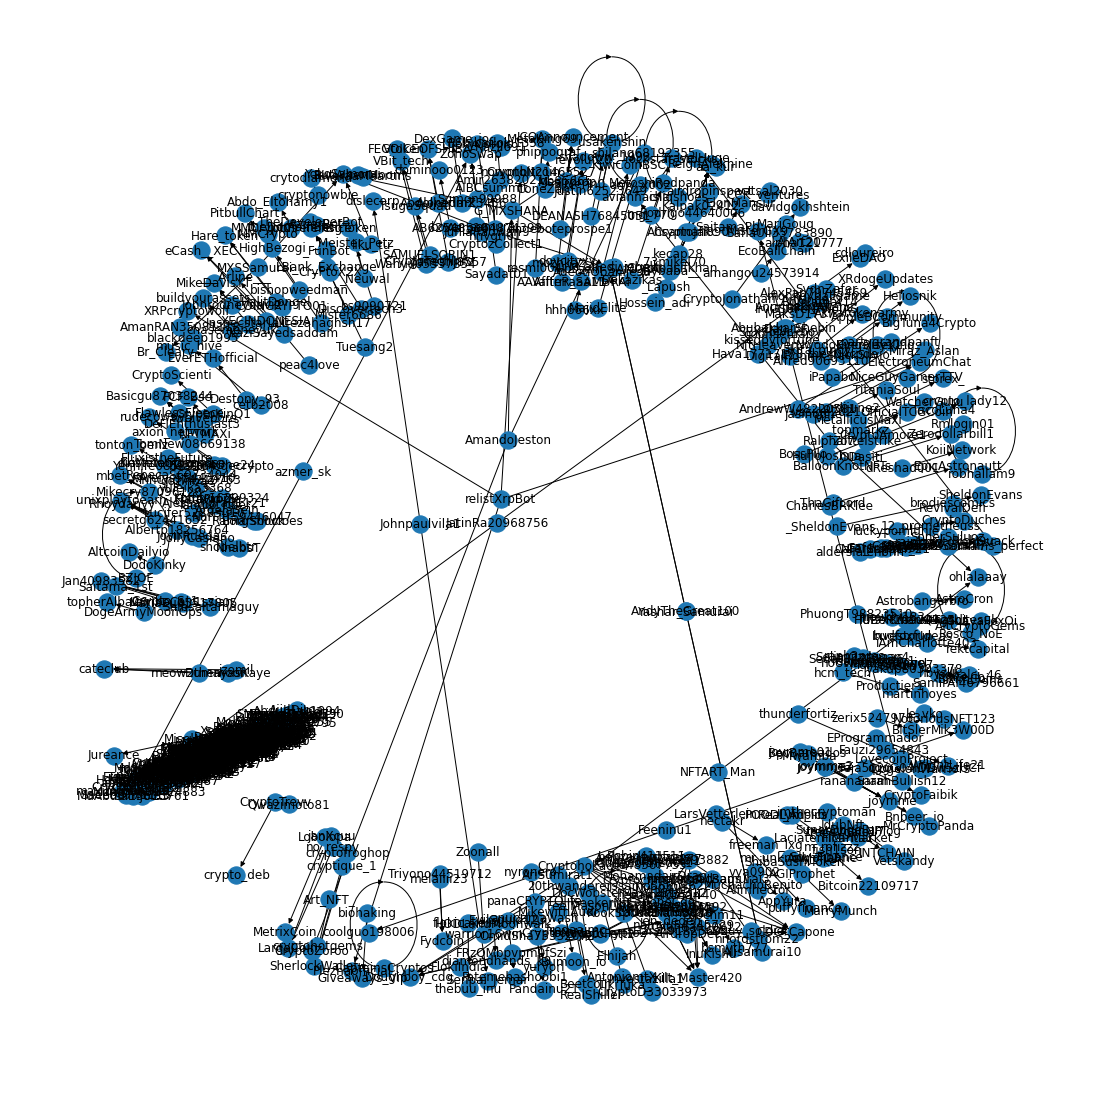

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
nx.draw(DG, with_labels=True)

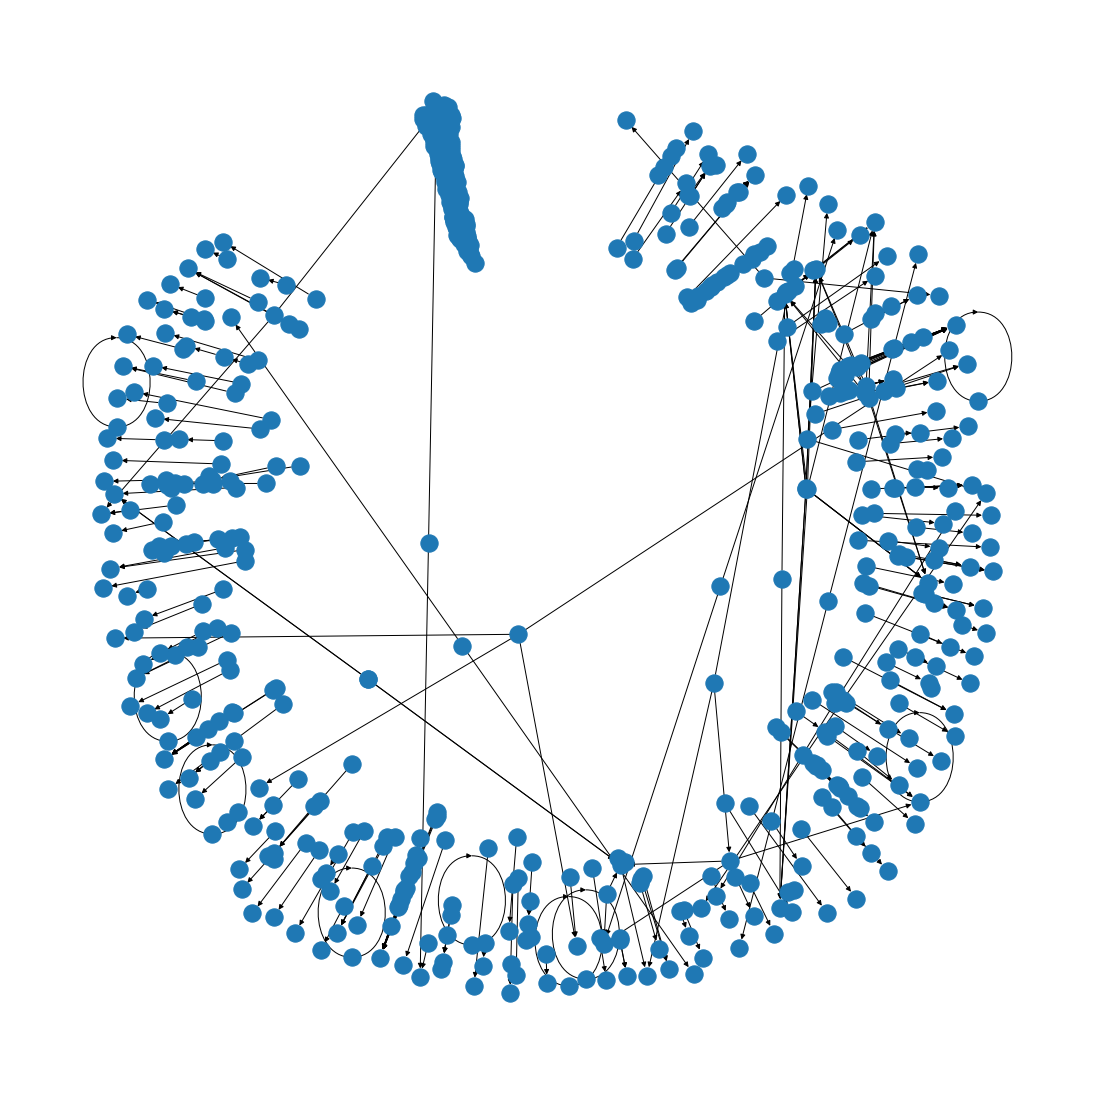

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
nx.draw(DG, with_labels=False)

In [ ]:
#Directed graphs full
DG_full = nx.DiGraph()
DG_full.add_weighted_edges_from(tuple_list_full)

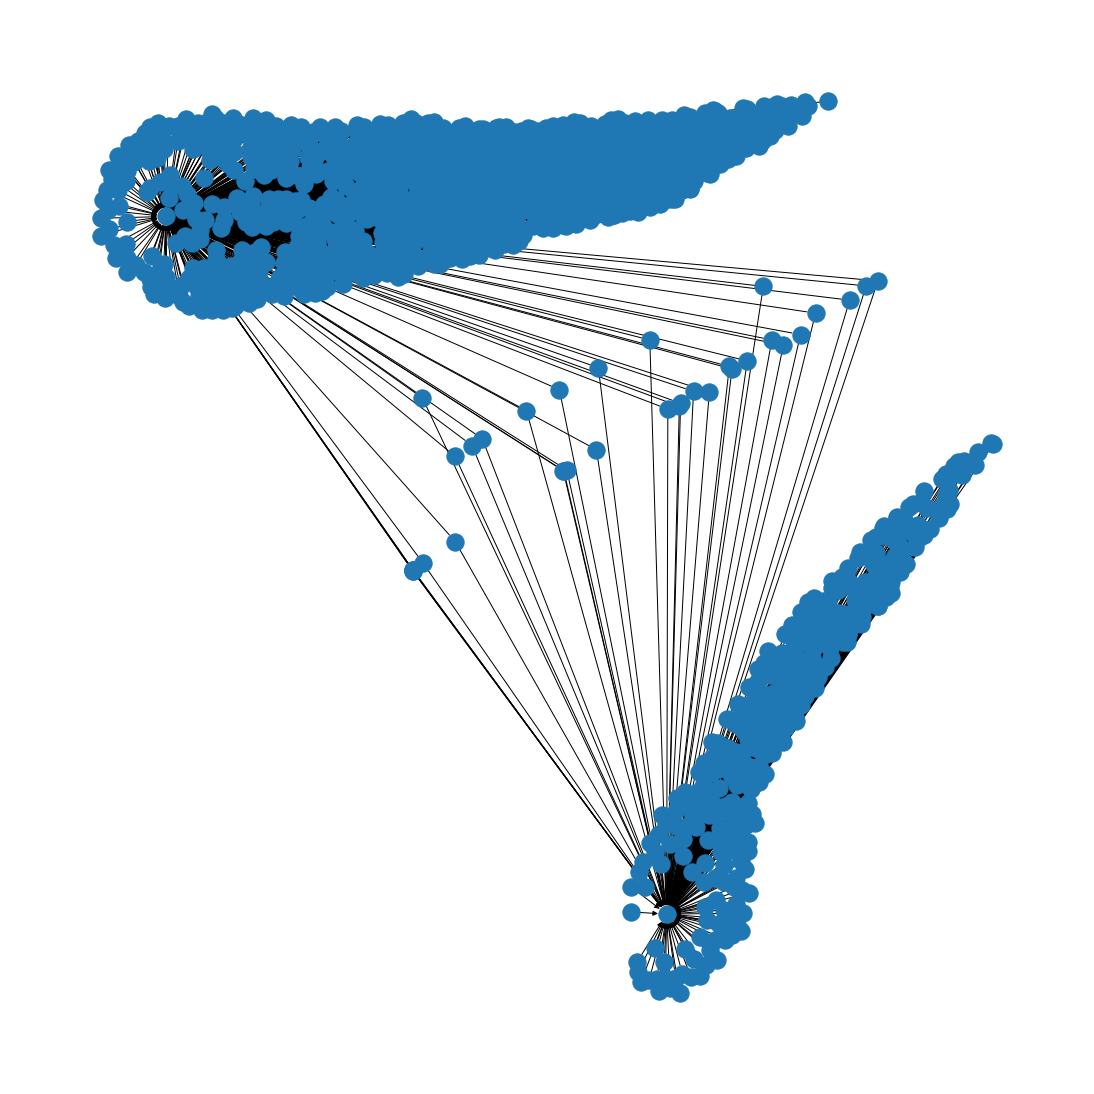

In [ ]:
#DG_smart #Community 1
DG_smart = nx.DiGraph()
DG_smart.add_weighted_edges_from(tuple_list_smart)
plt.rcParams["figure.figsize"] = (15,15)
nx.draw(DG_smart, with_labels=False)

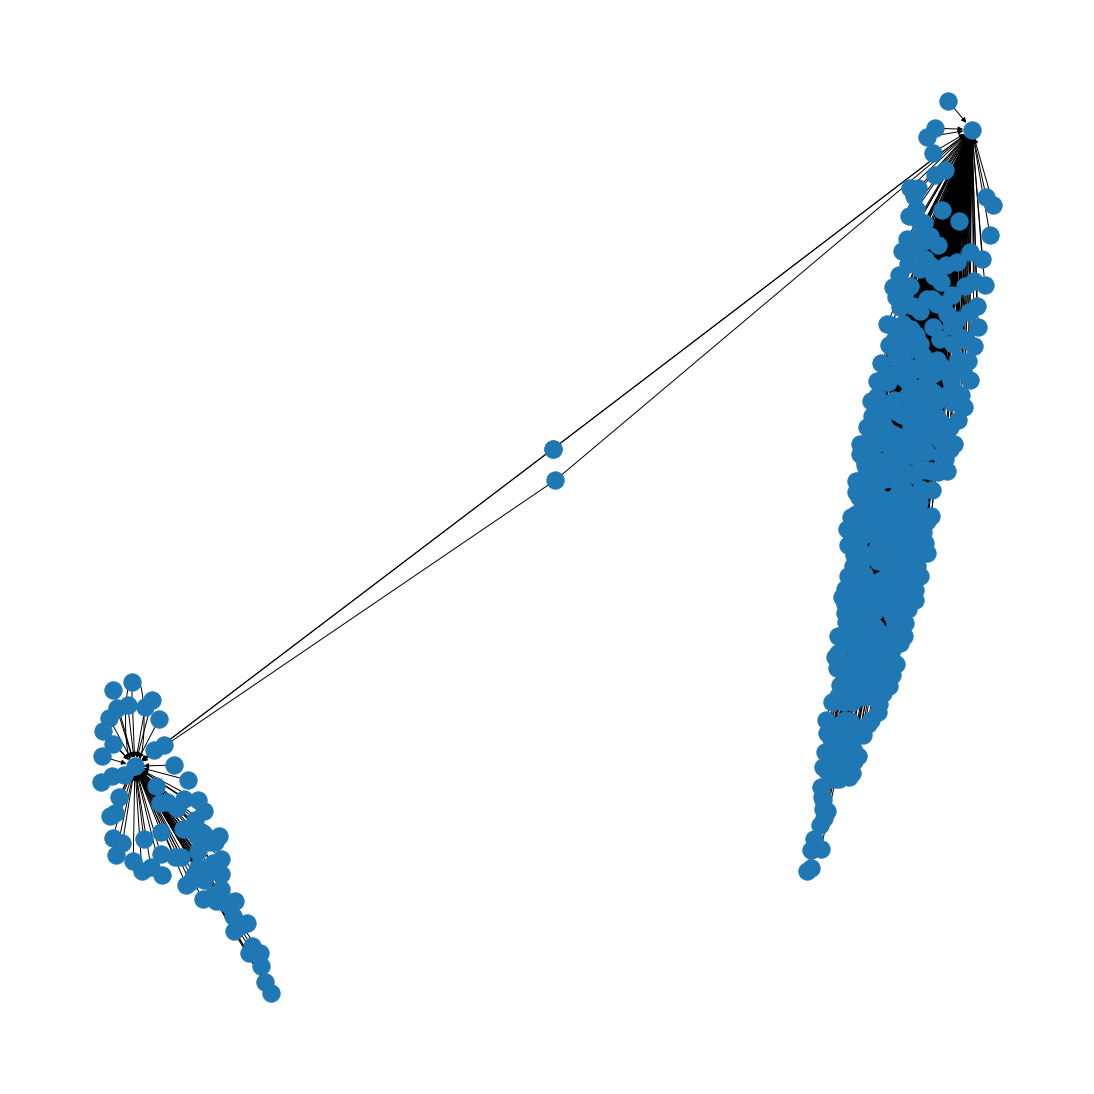

In [ ]:
#DG_smart #Community 2
DG_smart = nx.DiGraph()
DG_smart.add_weighted_edges_from(tuple_list_smart)
plt.rcParams["figure.figsize"] = (15,15)
nx.draw(DG_smart, with_labels=False)

## User Rank using Page Rank

In [ ]:
#Perform page rank in directed graph
pr = nx.pagerank(DG, alpha=0.9)

In [ ]:
user_ranks = pd.DataFrame(pr.items(), columns=['user_name','weight']).sort_values(by='weight', ascending=False)
user_ranks

,user_name,weight
1,CryptoTownEU,0.161867
197,usakenshin,0.028511
43,FluxistheFuture,0.011632
71,AirdropDet,0.011632
114,jen_degen,0.011533
...,...,...
290,Mdperve89424883,0.000755
291,Mdpolas50517687,0.000755
292,Mdtaraq43601430,0.000755
293,MehediH66447926,0.000755


In [ ]:
user_ranks.head(10)

,user_name,weight
1,CryptoTownEU,0.161867
197,usakenshin,0.028511
43,FluxistheFuture,0.011632
71,AirdropDet,0.011632
114,jen_degen,0.011533
24,monkeyballgame,0.010952
101,gate_io,0.009592
115,CaptainsCryptos,0.007303
181,Elhijah,0.007303
486,amy_x002,0.007303


In [ ]:
### With full data
pr = nx.pagerank(DG_full, alpha=0.9)
user_ranks = pd.DataFrame(pr.items(), columns=['user_name','weight']).sort_values(by='weight', ascending=False)
user_ranks

,user_name,weight
7,CryptoTownEU,0.065033
687,GyroCryptoBTC,0.031711
18,revolut20,0.022084
1,AirdropDet,0.019145
905,chiqshoes,0.014922
...,...,...
3497,NealSchiler,0.000059
3496,NeGeriD0n9eng11,0.000059
3495,NeGarik149,0.000059
3494,NduHerman,0.000059


In [ ]:
user_ranks.head(20)

,user_name,weight
7,CryptoTownEU,0.065033
687,GyroCryptoBTC,0.031711
18,revolut20,0.022084
1,AirdropDet,0.019145
905,chiqshoes,0.014922
529,AltcoinDailyio,0.012205
29,Eltanteco,0.012024
104,SheldonEvans,0.006345
42,Pandainu21,0.006231
47,SolanaPixsols,0.004734


## Centrality measures

In [ ]:
bc = nx.betweenness_centrality(DG_full, normalized=True,weight='weight')

In [ ]:
betweeness_centrality = pd.DataFrame(bc.items(), columns=['user_name','weight']).sort_values(by='weight', ascending=False)
betweeness_centrality 

,user_name,weight
1104,CaponeCdg,1.114460e-06
1108,jen_degen,6.609005e-07
1105,Doughboy_cdg,4.794768e-07
543,Hossein_SAMURAI,4.211621e-07
590,AndyTheGreat100,2.397384e-07
...,...,...
2942,MBehnamnik,0.000000e+00
2941,BlockchainBuds,0.000000e+00
2940,MBeastball,0.000000e+00
2939,MAlamin0890,0.000000e+00


In [ ]:
betweeness_centrality.head(20)

,user_name,weight
1104,CaponeCdg,1.114460e-06
1108,jen_degen,6.609005e-07
1105,Doughboy_cdg,4.794768e-07
543,Hossein_SAMURAI,4.211621e-07
590,AndyTheGreat100,2.397384e-07
1422,Yashar_Samurai,2.073413e-07
542,G_MXSHANA,2.008619e-07
1151,CharlesBRKlee,1.555060e-07
1916,NFTCRYPTOGOD,1.425472e-07
2825,LarsVetterlein,1.166295e-07


In [ ]:
cc = nx.closeness_centrality(DG_full)
closeness_centrality = pd.DataFrame(cc.items(), columns=['user_name','weight']).sort_values(by='weight', ascending=False)
closeness_centrality 

,user_name,weight
7,CryptoTownEU,0.144565
18,revolut20,0.050775
1,AirdropDet,0.044166
29,Eltanteco,0.026409
104,SheldonEvans,0.014001
...,...,...
3489,NavidM1,0.000000
3488,Navagolder1,0.000000
3487,Nate03972945,0.000000
3486,Natan02374890,0.000000


In [ ]:
closeness_centrality.head(20)

,user_name,weight
7,CryptoTownEU,0.144565
18,revolut20,0.050775
1,AirdropDet,0.044166
29,Eltanteco,0.026409
104,SheldonEvans,0.014001
42,Pandainu21,0.013546
289,CryptoAlcoholi,0.011155
47,SolanaPixsols,0.010586
687,GyroCryptoBTC,0.008651
108,Next100xToken,0.008310


In [ ]:
evc = nx.eigenvector_centrality(DG_full, max_iter=1000, weight='weight')
eigenvector_centrality = pd.DataFrame(evc.items(), columns=['user_name','weight']).sort_values(by='weight', ascending=False)
eigenvector_centrality 

,user_name,weight
4074,Rosco_NoE,9.995780e-01
1108,jen_degen,1.944743e-02
1104,CaponeCdg,1.402550e-02
1413,Kilt_Master420,1.123340e-02
1105,Doughboy_cdg,9.667464e-03
...,...,...
3497,NealSchiler,2.881087e-41
3496,NeGeriD0n9eng11,2.881087e-41
3495,NeGarik149,2.881087e-41
3494,NduHerman,2.881087e-41


### Magic Cuadrant

In [ ]:
closeness_centrality_df = closeness_centrality.rename(columns={"weight": "page_rank"})
closeness_centrality_df = closeness_centrality_df.set_index('user_name')
closeness_centrality_df

,page_rank
user_name,
CryptoTownEU,0.144565
revolut20,0.050775
AirdropDet,0.044166
Eltanteco,0.026409
SheldonEvans,0.014001
...,...
NavidM1,0.000000
Navagolder1,0.000000
Nate03972945,0.000000


In [ ]:
closeness_centrality_df = closeness_centrality_df.apply(lambda x: np.log(1000* (x**0.5)+1)/100)

In [ ]:
user_ranks_df = user_ranks.rename(columns={"weight": "Closeness"})
user_ranks_df = user_ranks_df.set_index('user_name') 
user_ranks_df

,Closeness
user_name,
CryptoTownEU,0.065033
GyroCryptoBTC,0.031711
revolut20,0.022084
AirdropDet,0.019145
chiqshoes,0.014922
...,...
NealSchiler,0.000059
NeGeriD0n9eng11,0.000059
NeGarik149,0.000059


In [ ]:
user_ranks_df = user_ranks_df.apply(lambda x: np.log(1000* (x**0.25)+1)/100)

In [ ]:
plot_df = pd.concat([closeness_centrality_df, user_ranks_df], axis = 1).head(13)
plot_df 

,page_rank,Closeness
CryptoTownEU,0.059434,0.062265
revolut20,0.054220,0.059571
AirdropDet,0.053526,0.059215
Eltanteco,0.050969,0.058056
SheldonEvans,0.047819,0.056463
Pandainu21,0.047655,0.056418
CryptoAlcoholi,0.046693,0.055416
SolanaPixsols,0.046433,0.055733
GyroCryptoBTC,0.045434,0.060474
Next100xToken,0.045235,0.055007


In [ ]:
plot_df

,page_rank,Closeness
CryptoTownEU,0.594337,0.600020
revolut20,0.542200,0.564161
AirdropDet,0.535260,0.559423
Eltanteco,0.509686,0.543997
SheldonEvans,0.478186,0.522815
Pandainu21,0.476547,0.522212
CryptoAlcoholi,0.466926,0.508900
SolanaPixsols,0.464333,0.513115
GyroCryptoBTC,0.454342,0.576169
Next100xToken,0.452349,0.503465


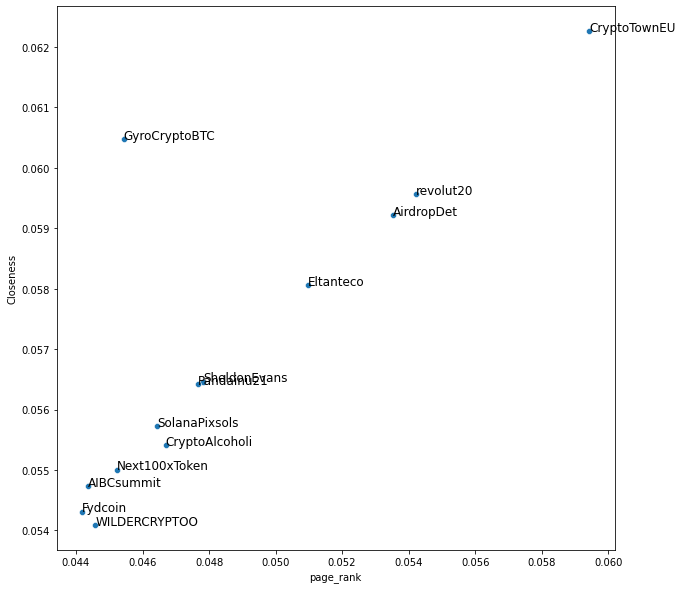

In [ ]:
import seaborn as sns
p1 = sns.scatterplot(data=plot_df, x="page_rank", y="Closeness")
plt.rcParams["figure.figsize"] = (10,10)
for line in range(0,plot_df.shape[0]):
     p1.text(plot_df.page_rank[line], plot_df.Closeness[line], 
     plot_df.index.array[line], horizontalalignment='left', 
     size='large', color='black')

## Communities

In [ ]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(DG_full)
top_level_communities = next(communities_generator)

In [ ]:
biggest_communities = []
for community in sorted(map(sorted, top_level_communities)):
  if len(community) > 20:
    print(len(community), community)
    biggest_communities.append(community)

21 ['000_Rhiz', 'Adriana49432905', 'Baobao72417195', 'BecBarbados', 'GoliathCruz', 'InuMinuBoo', 'KAINET_OFFICIAL', 'Logan_Cordoba', 'MoonshineSally1', 'MrCryptoPanda', 'NathanCrypto9', 'Ssj4Taker', 'Yedra78954336', 'cryptimely', 'cryptom0nster', 'd4rkcoffee', 'littlefairyy97', 'luffyholderpy', 'ne_auu', 'suminonacrypto', 'thecryptowalrus']
2237 ['00sabbir', '0Iktier', '0f4ZVDzolSjPOy8', '12gods1', '1354Sahand', '183Lounge', '1AlexRobin', '1Dakros', '1Leaf_', '20thwanderer', '210Farhana', '22Tanvir22', '272Java', '2Youtozz', '73mikel70', '767_si', '9longpositions', 'ABONEOL1134', 'ABUTALE26334614', 'AKShishir2', 'AKYX26', 'AMenzilci', 'AMinurjibon1', 'ARBEHZAD2', 'ARRocky64749344', 'Aashuto20781422', 'AbTechnO2', 'Abdella02478386', 'Abdul6076', 'AbdulAl75925881', 'AbdulHa27989510', 'AbdulHak1994', 'AbdulkarimTaof4', 'Abdulla17173036', 'Abdullah536a', 'AbdurRa22692552', 'AbdurRa33870413', 'Abdurra65986376', 'Abhishe43595585', 'Abina1122', 'Abir09141058', 'AbirHos88092790', 'AchhiaMst', 

In [ ]:
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['000_Rhiz',
  'Adriana49432905',
  'Baobao72417195',
  'BecBarbados',
  'GoliathCruz',
  'InuMinuBoo',
  'KAINET_OFFICIAL',
  'Logan_Cordoba',
  'MoonshineSally1',
  'MrCryptoPanda',
  'NathanCrypto9',
  'Ssj4Taker',
  'Yedra78954336',
  'cryptimely',
  'cryptom0nster',
  'd4rkcoffee',
  'littlefairyy97',
  'luffyholderpy',
  'ne_auu',
  'suminonacrypto',
  'thecryptowalrus'],
 ['00sabbir',
  '0Iktier',
  '0f4ZVDzolSjPOy8',
  '12gods1',
  '1354Sahand',
  '183Lounge',
  '1AlexRobin',
  '1Dakros',
  '1Leaf_',
  '20thwanderer',
  '210Farhana',
  '22Tanvir22',
  '272Java',
  '2Youtozz',
  '73mikel70',
  '767_si',
  '9longpositions',
  'ABONEOL1134',
  'ABUTALE26334614',
  'AKShishir2',
  'AKYX26',
  'AMenzilci',
  'AMinurjibon1',
  'ARBEHZAD2',
  'ARRocky64749344',
  'Aashuto20781422',
  'AbTechnO2',
  'Abdella02478386',
  'Abdul6076',
  'AbdulAl75925881',
  'AbdulHa27989510',
  'AbdulHak1994',
  'AbdulkarimTaof4',
  'Abdulla17173036',
  'Abdullah536a',
  'AbdurRa22692552',
  'AbdurRa338

## See what they are retweeting

In [ ]:
CryptoTownEU_df = find_messages_with_str(find_messages_with_retweet(df), 'RT @CryptoTownEU')
CryptoTownEU_df

,id,name,screen_name,created_at,text,location,followers_count,friends_count,listed_count,retweet_count,favorite_count
2,1460631060778303490,Coldstar,Coldsta93422887,2021-11-16 15:29:16,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,5,346,1,1318,0
24,1460631030935666693,abdoo,abdoo28864890,2021-11-16 15:29:09,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,5,200,0,1318,0
38,1460631011235041282,Md: Shamim,Shamim207,2021-11-16 15:29:04,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,1,199,0,1318,0
40,1460631009595215882,Mohammad,Mohammad272255,2021-11-16 15:29:04,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 #Airdrop:...,NaN,0,12,0,18434,0
44,1460631008387031042,Sai Zaw,SaiZaw11218001,2021-11-16 15:29:04,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 #Airdrop:...,NaN,0,8,0,18434,0
...,...,...,...,...,...,...,...,...,...,...,...
11511,1461103773275856902,oladele bowofola,Oladelemrboss,2021-11-17 22:47:40,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,"Ikeja-lagos, Nigeria",142,632,2,4182,0
11516,1461103756083404805,Hiếu Dung,HiuDung3,2021-11-17 22:47:36,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,27,248,0,18092,0
11521,1461103747677966339,Alireza5885,Alireza58851,2021-11-17 22:47:34,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,28,1214,0,4004,0
11529,1461103726064812032,Muhammad Asad Nadeem,Muhammad8255011,2021-11-17 22:47:28,b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: ...,NaN,7,111,0,18092,0


In [ ]:
small_df = CryptoTownEU_df['text'].drop_duplicates()

In [ ]:
for row in small_df:
  print(row)

b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: Adora\n\xf0\x9f\x92\xb0 Value: $ 25 worth $ARA\n\xf0\x9f\x91\xa5 Referral: $ 100 worth $ARA\n\xf0\x9f\x93\x8a Exchange: CoinmarketCap, CoinGecko, BigOne, Bico\xe2\x80\xa6'
b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 #Airdrop: Adora\n\xf0\x9f\x92\xb0 Value: $ 25 worth $ARA\n\xf0\x9f\x91\xa5 Referral: $ 100 worth $ARA\n\xf0\x9f\x93\x8a Exchange: CoinmarketCa, CoinGecko, BigOne, Bico\xe2\x80\xa6'
b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: Dexgem\n\xf0\x9f\x92\xb0 Value: $5 Worth of $DEXGEM\n\xf0\x9f\x91\xa5 Referral: $0.25 Worth of $DEXGEM\n\xf0\x9f\x93\x85 End Date: 22nd December, 2021\n\xf0\x9f\x8f\xa6 Distr\xe2\x80\xa6'
b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: LordArena\n\xf0\x9f\x92\xb0 Value: $ 7.5 (500 $LORDA) \n\xf0\x9f\x91\xa5 Referral: $ 0.3 (20 $LORDA) \n\xf0\x9f\x8f\x86 Winners: 4000\n\xf0\x9f\x93\x92 Partnership:  Lavender\xe2\x80\xa6'
b'RT @CryptoTownEU: \xf0\x9f\x9a\x80 Airdrop: Doge Army Token \n\xf0\x9f\x92\xb0 Value: $ 2.5 (5